In [2]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

### Load from Saves:

In [20]:
cost_list = np.array([])
#traj_list = np.zeros((0, 7, 2))
#traj_list = np.zeros((0, 3, 2))
traj_list = np.zeros((0, 5, 2))
min_cost = 1e+500

save_folder = "Run19_complexscene1"

for _, _, file_names in os.walk("Saves/" + save_folder):
    for file_name in file_names:
        if re.search('traj', file_name):
            traj = np.load("Saves/" + save_folder + "/" + file_name)
            traj_list = np.concatenate([traj_list, traj], axis = 0)
        if re.search('costs', file_name):
            cost = np.load("Saves/" + save_folder + "/" + file_name)
            cost_list = np.append(cost_list, cost)
            for i in range(cost.size):
                if cost[i]< min_cost:
                    min_cost = cost[i]
                    index = i
                    time_stamp = re.findall('s.*n', file_name)[0][3:-1]

best_cost = np.load("Saves/" + save_folder + "/costs" + time_stamp + 'npy')[index]
best_traj = np.load("Saves/" + save_folder + "/latest_trajectory_list" + time_stamp + 'npy')[index]
print(best_cost)
print(best_traj)

40275.51232434748
[[ 0.00000000e+00 -8.00000000e-01]
 [-1.52948446e+00 -1.35013352e+00]
 [-2.17146214e+00 -1.84144364e+00]
 [-5.63410448e-01 -1.07149058e+00]
 [ 8.00000000e-01  2.04578383e-16]]


### Load from Results:

In [29]:
cost_list = np.array([])
traj_list = np.zeros((0, 7, 2))
#traj_list = np.zeros((0, 3, 2))
#traj_list = np.zeros((0, 5, 2))
min_cost = 1e+500

save_folder = "Run13_longobstacle"

for _, _, file_names in os.walk("Results/" + save_folder + "/costs_and_trajectories/"):
    for file_name in file_names:
        if re.search('traj', file_name):
            traj = np.load("Results/" + save_folder + "/costs_and_trajectories/" + file_name)
            traj_list = np.concatenate([traj_list, traj], axis = 0)
        if re.search('costs', file_name):
            cost = np.load("Results/" + save_folder + "/costs_and_trajectories/" + file_name)
            cost_list = np.append(cost_list, cost)
            for i in range(cost.size):
                if cost[i]< min_cost:
                    min_cost = cost[i]
                    index = i
                    time_stamp = re.findall('s.*n', file_name)[0][3:-1]

best_cost = np.load("Results/" + save_folder + "/costs_and_trajectories/costs" + time_stamp + 'npy')[index]
best_traj = np.load("Results/" + save_folder + "/costs_and_trajectories/latest_trajectory_list" + time_stamp + 'npy')[index]
print(best_cost)
print(best_traj)

1336.8514081478643
[[ 0.35       -0.15      ]
 [ 0.37883365 -0.26772166]
 [ 0.34675562 -0.26720263]
 [ 0.16438019  0.17393841]
 [ 0.09625268  0.54550408]
 [ 0.34979446  0.3720847 ]
 [ 0.55        0.15      ]]


In [21]:
traj_list.shape

(78, 5, 2)

In [9]:
cost_list.size

60

In [56]:
sorted_list = np.sort(cost_list)
best_index2 = np.where(cost_list==sorted_list[2])[0][0]
print(best_index2)

166


In [57]:
best_traj = traj_list[best_index2].copy()

Text(0.5, 1.0, 'Cost Graph')

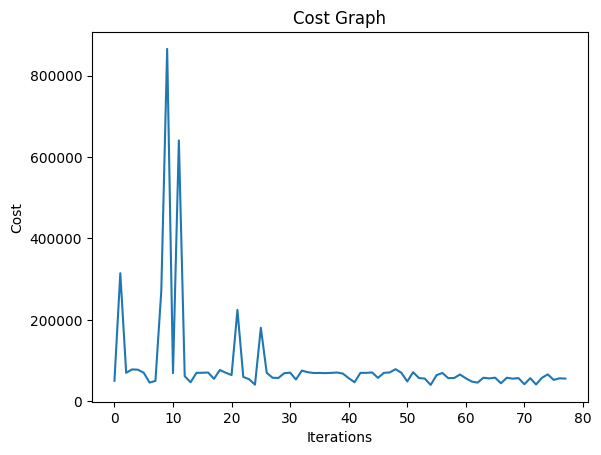

In [22]:
plt.plot(cost_list)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Graph")
#plt.savefig('Results/' + save_folder + '/cost_graph.png')

[[ 0.46988944 -0.30547034  3.05906346  0.        ]
 [ 0.4198921  -0.53550322  2.59671362  0.        ]
 [ 0.27679054 -0.38805838  2.32970556  0.        ]
 [ 0.16788265 -0.56170695  6.2531929   1.        ]
 [ 0.63567718 -0.63455435  2.09023113  2.        ]
 [ 0.22939708 -0.18035346  5.86976985  0.        ]]
[[ 0.00000000e+00 -8.00000000e-01]
 [-1.52948446e+00 -1.35013352e+00]
 [-2.17146214e+00 -1.84144364e+00]
 [-5.63410448e-01 -1.07149058e+00]
 [ 8.00000000e-01  2.04578383e-16]]


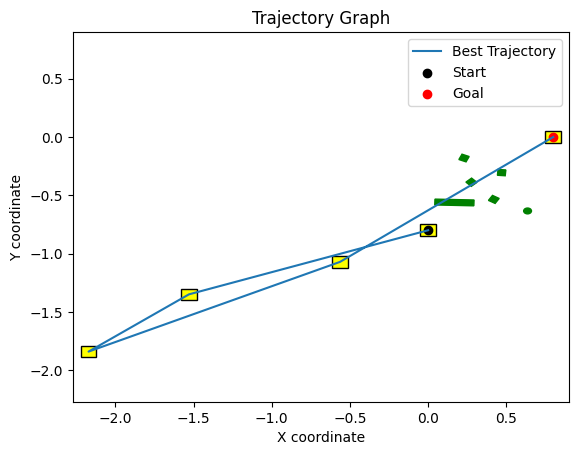

In [23]:
obs = np.load('obstacle_locations/complex_scene1.npy')
shapes = ['cube', 'cuboid', 'cylinder']
#obs = np.load('Results/' + save_folder + '/obstacle_config.npy')
#np.save('Results/' + save_folder + '/obstacle_config.npy', obs)

print(obs)
print(best_traj)
#best_traj2 = traj_list[best_index2].copy()

plt.plot(best_traj[:, 0], best_traj[:, 1], label = 'Best Trajectory')

for i in range(obs.shape[0]):
    
    obs_type = shapes[int(obs[i, 3])]
    
    if obs_type == 'cylinder':
        obstacle = plt.Circle((obs[i, 0], obs[i, 1]), color = 'green',
                              radius = 0.025)
        
    elif obs_type == 'cube':
        obstacle = plt.Rectangle((obs[i, 0] - 0.05/2, obs[i, 1] - 0.05/2), 
                                0.05, 
                                0.05, 
                                color = 'green', 
                                angle = obs[i, 2] * 180/np.pi, 
                                rotation_point = 'center')
        
    elif obs_type == 'cuboid':
        obstacle = plt.Rectangle((obs[i, 0] - 0.25/2, obs[i, 1] - 0.05/2), 
                                0.25, 
                                0.05, 
                                color = 'green', 
                                angle = obs[i, 2] * 180/np.pi, 
                                rotation_point = 'center')
    
    plt.gca().add_patch(obstacle)

for i in range(best_traj.shape[0]):
    
    target = plt.Rectangle((best_traj[i, 0] - 0.1/2, best_traj[i, 1] - 0.1/2), 
                            0.1, 
                            0.1, 
                            facecolor = 'yellow',
                            edgecolor = 'black',
                            angle = 0, #best_traj[i, 2] * 180/np.pi, 
                            rotation_point = 'center')
    plt.gca().add_patch(target)


plt.scatter(0.0, -0.8, color = 'black', label = 'Start')
plt.scatter(0.8, 0.0, color = 'red', label = 'Goal')

#plt.scatter(best_traj[-1, 0], best_traj[-1, 1], color = 'red', label = 'Goal')

lower_limit = np.min(best_traj) - 0.1
upper_limit = np.max(best_traj) + 0.1

plt.xlim([lower_limit, upper_limit])
plt.ylim([lower_limit, upper_limit])

leg = plt.legend()

# handles, labels = plt.get_legend_handles_labels()
# patch = mpatches.Patch(color='green', label='Obstacles')
# handles.append(patch) 

#plt.legend(handles=[patch])
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('Trajectory Graph')

#plt.savefig('Results/' + save_folder + '/trajectory_graph.png')

plt.show()